In [1]:
import pandas as pd 
import os 
import numpy as np 
from glob import glob 

# 정량 

In [10]:
exp_name = "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/baseline6_200epoch-*-Continual_True-online_False/seed_42/results"

csv_dirs = glob(os.path.join(exp_name,'main.csv'))

df = pd.DataFrame()
for cv in csv_dirs: 
    temp = pd.read_csv(cv)
    temp['exp_name'] = cv.split('/')[-4].split('-')[1]
    df = pd.concat([df,temp[temp['class_name']=='AA']])
    

In [11]:
df = df.drop(columns=['Unnamed: 0','class_name'])[['exp_name','img_level_auroc','pix_level_auroc','img_level_average_precision','pix_level_average_precision']]

In [12]:
df.set_index(df['exp_name']).drop(columns='exp_name').T

exp_name,10_1_with_5_step,14_1_with_1_step,3_5_with_5_step,10_5_with_1_step
img_level_auroc,0.620077,0.776285,0.553326,0.710362
pix_level_auroc,0.804573,0.875475,0.686883,0.812187
img_level_average_precision,0.833054,0.878192,0.747689,0.827525
pix_level_average_precision,0.163571,0.259706,0.059901,0.252671


In [13]:
exp_name = "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/baseline6_200epoch-*-Continual_True-online_False/seed_42/results"

csv_dirs = glob(os.path.join(exp_name,'forgetting.csv'))

df = pd.DataFrame()
for cv in csv_dirs: 
    temp = pd.read_csv(cv)
    temp['exp_name'] = cv.split('/')[-4].split('-')[1]
    df = pd.concat([df,temp[temp['class_name']=='all']])
    

In [14]:
df[['metric','AF','exp_name']].pivot_table(columns=['exp_name','metric'])

exp_name 10_1_with_5_step                                              \
metric    img_level_auroc img_level_average_precision pix_level_auroc   
AF               0.335818                    0.150864          0.1745   

exp_name                             10_5_with_1_step  \
metric   pix_level_average_precision  img_level_auroc   
AF                          0.336552         0.220168   

exp_name                                              \
metric   img_level_average_precision pix_level_auroc   
AF                           0.14792        0.150628   

exp_name                             14_1_with_1_step  \
metric   pix_level_average_precision  img_level_auroc   
AF                          0.179032         0.156807   

exp_name                                              \
metric   img_level_average_precision pix_level_auroc   
AF                          0.095445         0.09765   

exp_name                             3_5_with_5_step  \
metric   pix_level_average_precision img_level_auroc   
AF                          0.157163        0.242684   

exp_name                                              \
metric   img_level_average_precision pix_level_auroc   
AF                          0.156108        0.226687   

exp_name                              
metric   pix_level_average_precision  
AF                          0.233409

# 성능 변화 

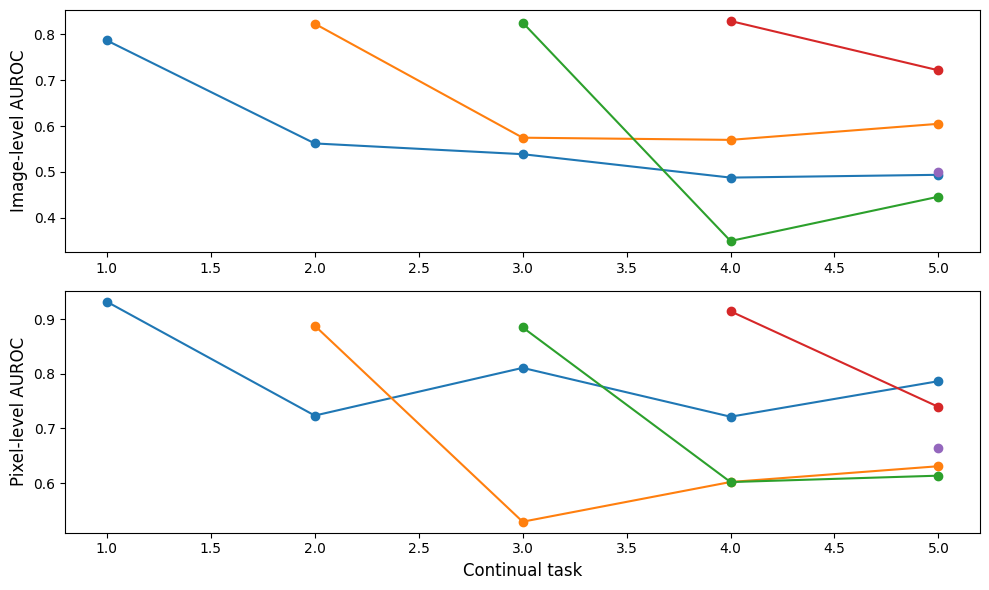

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
csv_dir = "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/baseline6_200epoch-3_5_with_5_step-Continual_True-online_False/seed_42/results/result_log.csv"
df = pd.read_csv(csv_dir)

task_list = df['GT_class_name'].unique()


fig, ax = plt.subplots(2,1,figsize=(10, 6))

for num, task in enumerate(task_list):
    if num == 0 : 
        temp = df[(df['class_name']==task) & (df['last']==1)]
    else: 
        temp = df[(df['class_name']==task) & (df['last']==1)].iloc[1:]
      
    
    ax[0].plot(
        np.arange(num+1, 6),
        temp['img_level_auroc'],
        label = task,
        marker='o'
    )
    
    ax[1].plot(
        np.arange(num+1, 6),
        temp['pix_level_auroc'],
        label = task,
        marker='o'
    )
    
    
ax[0].set_ylabel("Image-level AUROC", fontsize=12)
# ax[0].legend(title="GT Class", bbox_to_anchor=(1.02, 1), loc='upper left')    

ax[1].set_ylabel("Pixel-level AUROC", fontsize=12)
ax[1].set_xlabel("Continual task", fontsize=12)

plt.tight_layout()
plt.show()

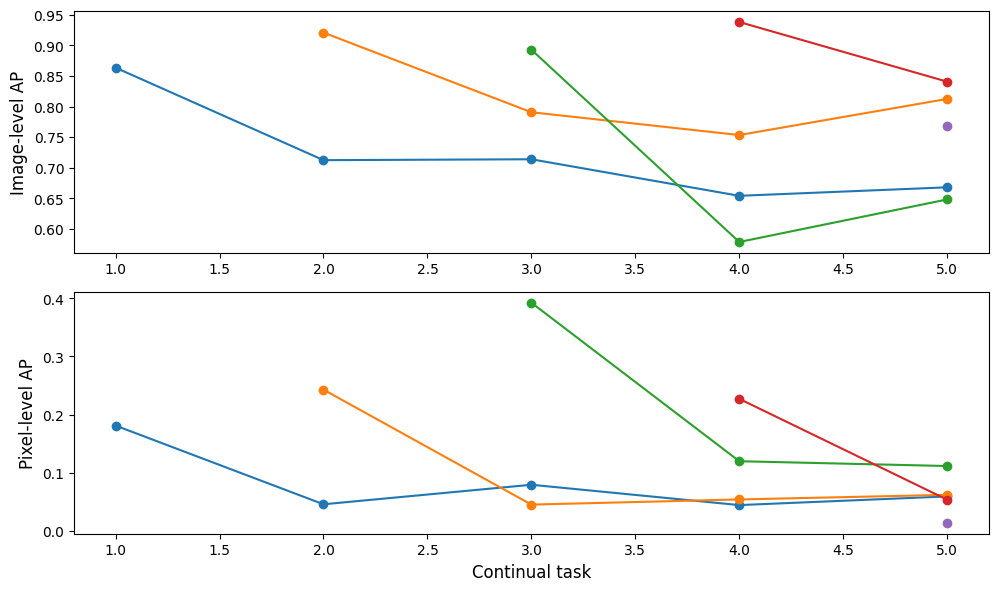

In [16]:
import seaborn as sns 
csv_dir = "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/baseline6_200epoch-3_5_with_5_step-Continual_True-online_False/seed_42/results/result_log.csv"
df = pd.read_csv(csv_dir)

task_list = df['GT_class_name'].unique()


fig, ax = plt.subplots(2,1,figsize=(10, 6))

for num, task in enumerate(task_list):
    if num == 0 : 
        temp = df[(df['class_name']==task) & (df['last']==1)]
    else: 
        temp = df[(df['class_name']==task) & (df['last']==1)].iloc[1:]
      
    
    ax[0].plot(
        np.arange(num+1, 6),
        temp['img_level_average_precision'],
        label = task,
        marker='o'
    )
    
    ax[1].plot(
        np.arange(num+1, 6),
        temp['pix_level_average_precision'],
        label = task,
        marker='o'
    )
    
    
ax[0].set_ylabel("Image-level AP", fontsize=12)
# ax[0].legend(title="GT Class", bbox_to_anchor=(1.02, 1), loc='center')    
# ax[1].legend(
    
#     loc='lower center',
#     bbox_to_anchor=(0.5, -0.4),  # 플롯 아래로 내림
#     ncol=len(task_list),
#     frameon=False
# )

ax[1].set_ylabel("Pixel-level AP", fontsize=12)
ax[1].set_xlabel("Continual task", fontsize=12)

plt.tight_layout()
plt.show()